<a href="https://colab.research.google.com/github/edwardchome/ml_deeplearning/blob/main/deep_learnin_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import Input

Input(shape=(13,))

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'input_1')>

**Using Sequential model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(10,input_shape=(13,),activation='relu'),
                    Dense(10,activation='relu'),
                    Dense(1)                    
])

model.summary()
model.compile(loss='mse',optimizer='rmsprop')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                140       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


**Using functional api**

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

inputs = Input((13,))
input = Dense(10,activation='relu')(inputs)
hidden = Dense(10,activation='relu')(input)
output = Dense(1)(hidden)

model = Model(inputs, output)

model.summary()
model.compile(loss='mse', optimizer='rmsprop')

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_36 (Dense)            (None, 10)                140       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


**DNN binary classifier**

**Sequential api**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(10,input_shape=(13,),activation='relu'),
                    Dense(10,activation='relu'),
                    Dense(1,activation='sigmoid')                    
])

model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                140       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


**functional api**

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, ReLU, Activation

inputs = Input((13,))
x = Dense(10)(inputs)
x = Activation('relu')(x)
x = Dense(10)(x)
x = Activation('relu')(x)
x = Dense(1)(x)
output = Activation('sigmoid')(x)

model = Model(inputs, output)
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_45 (Dense)            (None, 10)                140       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
 activation_5 (Activation)   (None, 1)                 0   

**DNN multiclass classifier**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                50        
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 5)                 55        
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


**DNN multilabel multiclass classifier**

We also want to treat each output class as a binary
classifier, meaning we want a yes/no type of answer, so we change the activation function
to sigmoid. so we use binary cross entropy

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                40        
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 7)                 77        
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


So which design is correct (or better) for a multilabel multiclass classifier? It depends
on the application. If all the classes are from a single category—such as age
demographic—use the first pattern, the single task. If the classes come from different
categories—such as age demographic and gender—use the second pattern, the
multitask. In this example, we use the multitask pattern, because we want to learn two
categories as output.

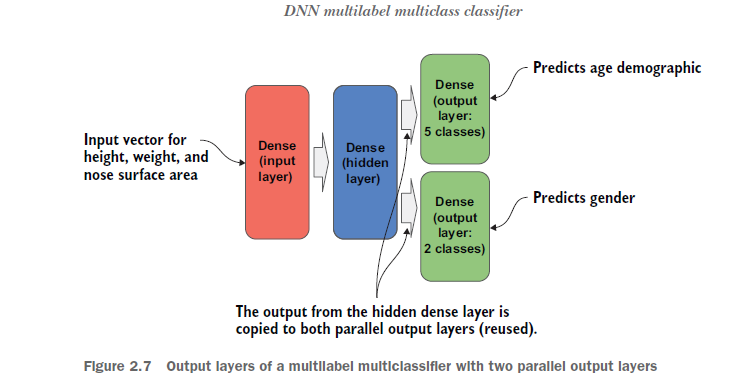

In [24]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

inputs = Input((3,))

x = Dense(10, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)

output1 = Dense(5, activation='softmax')(x)
output2 = Dense(2, activation='softmax')(x)

model = Model(inputs, [output1, output2])

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 3)]          0           []                               
                                                                                                  
 dense_60 (Dense)               (None, 10)           40          ['input_11[0][0]']               
                                                                                                  
 dense_61 (Dense)               (None, 10)           110         ['dense_60[0][0]']               
                                                                                                  
 dense_62 (Dense)               (None, 5)            55          ['dense_61[0][0]']               
                                                                                            

**Simple image classifier**

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, ReLU, Activation

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 512)               401920    
                                                                 
 dense_65 (Dense)            (None, 512)               262656    
                                                                 
 dense_66 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


**introducing dropout**

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, ReLU, Activation, Dropout

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(ReLU())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(ReLU())
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_67 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_68 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 re_lu_1 (ReLU)              (None, 512)             

**The ConvNet design for a CNN**

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),strides=(2,2), padding='same', input_shape=(128,128,1)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())

model.add(Dense(512))
model.add(ReLU())
model.add(Dense(26))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 512)               8389120   
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                        

**Sequential model variation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same",activation='relu', input_shape=(128,128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

**Using the funtional api**

In [5]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

inputs = Input(shape=(128, 128, 1))
layer = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same",activation='relu')(inputs)
layer = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(512, activation='relu')(layer)

outputs = Dense(26, activation='softmax')(layer)

model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               8389120   
                                                                 
 dense_9 (Dense)             (None, 26)                13338     
                                                           

**VGG16 Implementation**

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
def conv_block(n_layers, n_filters):
  """
  n_layers : number of convolutional layers
  n_filters: number of filters
  """
  for n in range(n_layers):
    model.add(Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",activation="relu"))

  model.add(MaxPooling2D(2, strides=2))

In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding="same",activation="relu",input_shape=(224, 224, 3)))

conv_block(1, 64)
conv_block(2, 128)
conv_block(3, 256)
conv_block(3, 512)
conv_block(3, 512)

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    